In [67]:
import pandas as pd

In [68]:
df = pd.read_csv("/Users/kunu/Desktop/ML Experiments/1. Dataset Download/Iris.csv")

In [69]:
from plotly import express as ex

ex.scatter_3d(df,x=df['PetalLengthCm'],
              y=df['PetalWidthCm'],
              z=df['SepalLengthCm'],
              size=df['SepalWidthCm'],
              color=df['Species'])

In [70]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
108,109,6.7,2.5,5.8,1.8,Iris-virginica
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
141,142,6.9,3.1,5.1,2.3,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
109,110,7.2,3.6,6.1,2.5,Iris-virginica
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
12,13,4.8,3.0,1.4,0.1,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
83,84,6.0,2.7,5.1,1.6,Iris-versicolor


In [71]:
X = df.drop('Id',axis=1).iloc[:,:4]
y = df['Species']

In [72]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,stratify=y)

In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200,verbose=0,solver='newton-cg')

model = lr.fit(train_x,train_y)

In [75]:
y_pred = model.predict(test_x)

In [76]:
from sklearn import metrics

print("The accuracy of the model is: ",metrics.accuracy_score(test_y,y_pred)*100)
print("The recall of the model is: ",metrics.recall_score(test_y,y_pred,average='weighted')*100)
print("The precision of the model is: ",metrics.precision_score(test_y,y_pred,average='weighted')*100)
print('\t\tClassification Report:\n', metrics.classification_report(test_y, y_pred,target_names=["Setosa", "Virginica", "Versicolor"]))

The accuracy of the model is:  100.0
The recall of the model is:  100.0
The precision of the model is:  100.0
		Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



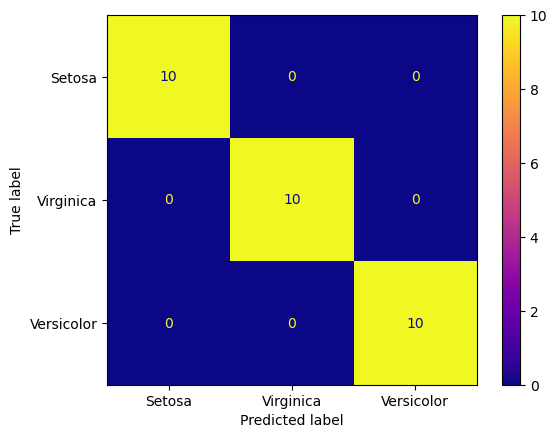

In [77]:
cm = metrics.confusion_matrix(test_y,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Setosa", "Virginica", "Versicolor"])
cm_display.plot(cmap='plasma')

In [78]:
y_pred_prob = model.predict_proba(test_x)
y_pred_log = model.predict_log_proba(test_x)

/var/folders/32/dhq7gf0n5yq0162cwcsynrtm0000gn/T/ipykernel_59555/277656825.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



Text(0, 0.5, 'Log probablities')

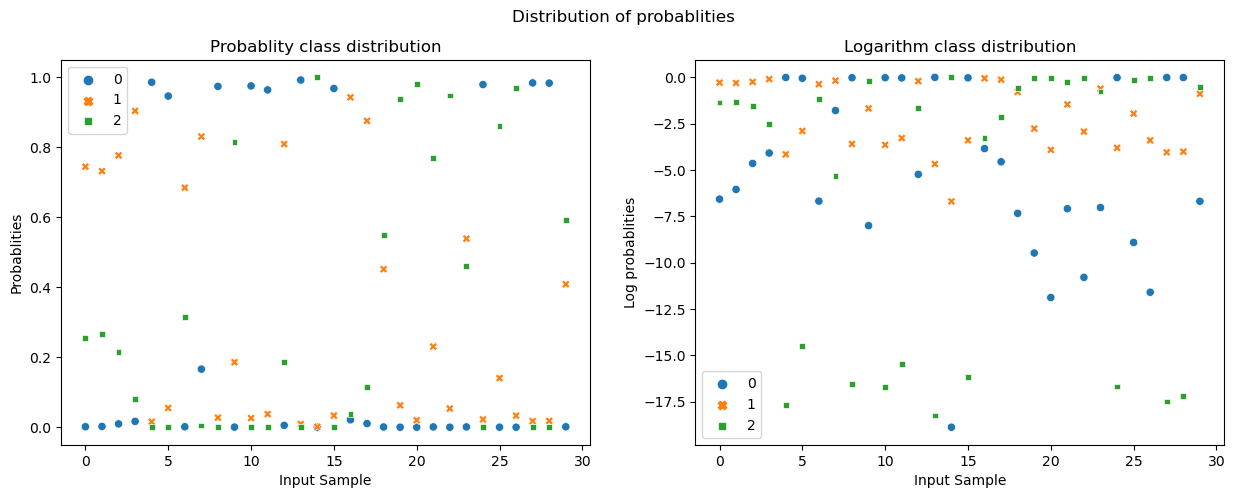

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15,5))
plt.suptitle("Distribution of probablities")

plt.subplot(1,2,1)
sns.scatterplot(y_pred_prob)
plt.title('Probablity class distribution')
plt.xlabel('Input Sample')
plt.ylabel('Probablities')

plt.subplot(1,2,2)
sns.scatterplot(y_pred_log)
plt.title('Logarithm class distribution')
plt.xlabel('Input Sample')
plt.ylabel('Log probablities')